# SARSAの実装


In [1]:
from collections import defaultdict
import gym
import numpy as np
import matplotlib.pyplot as plt
from frozen_lake_util import show_q_value

# matplotlibで日本語を使用するために必要です。環境に応じて日本語フォントを指定
plt.rcParams['font.family'] = 'MyricaM M' 

In [2]:
# パラメーター
n_episode = 500 # 何回エピソードを回すか
gamma = 0.9     # 割引率 
learning_rate = 0.1 # 学習率
epsilon = 0.1
render = False # 描画するか

env = gym.make('FrozenLakeEasy-v0')
num_actions = env.action_space.n    # とれる行動の数. FrozenLakeでは上下左右の4方向
actions = list(range(num_actions))  # 取り得る行動の方向をリスト（[0, 1, 2, 3]）で表現
Q = defaultdict(lambda: [0] * num_actions) # Qテーブルの初期化

# seedの固定
np.random.seed(123)
env.seed(123)

[123]

In [3]:
def ep_greedy(Q, state):
    if np.random.random() < epsilon:
        return np.random.randint(num_actions) # n_actionsはグローバル
    else:
        if state in Q and sum(Q[state]) != 0: # Qに値が入っている場合
            # Qは{s: [Q(a1), Q(a2), Q(a3), Q(a4)]}みたいになってるので、最大値を取るindex=actionになる
            return np.argmax(Q[state]) 
        else:
            return np.random.randint(num_actions)

In [4]:
reward_history = []
for e in range(n_episode):
    state = env.reset() # 初期化
    action = ep_greedy(Q, state) # 最初の行動
    done = False

    count_time = 1
    while not done:
        if render:
            env.render() # 描画
        
        next_state, reward, done, _ = env.step(action) # envにactionを渡して状態遷移
        next_action = ep_greedy(Q, next_state) # 次の状態における、行動を決定
        
        # Qを更新
        td_error = reward + gamma * Q[next_state][next_action] - Q[state][action]
        Q[state][action] += learning_rate * td_error
        # 状態、行動を更新
        state = next_state
        action = next_action

        count_time += 1
    reward_history.append(reward/count_time)

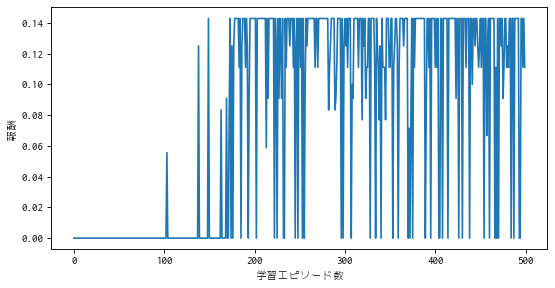

In [5]:
fig = plt.figure(figsize=(8, 4), dpi=80)
ax = fig.add_subplot()
ax.plot(reward_history)
ax.set_xlabel('学習エピソード数')
ax.set_ylabel('報酬')
plt.savefig('images/sarsa_train.png')
plt.show()

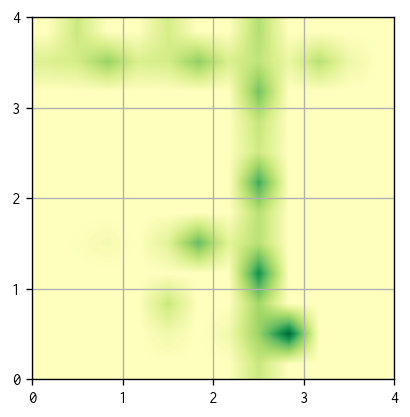

In [6]:
show_q_value(Q, savedir="images/sarsa_q.png")